In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import os

In [ ]:
# Update Matplotlib rcParams
mpl.rcParams.update({
    'font.family': 'serif',  # Use serif font
    'axes.labelsize': 18,  # Set axes label font size
    'axes.titlesize': 20,  # Set axes title font size
    'font.size': 16,  # Set general font size
    'legend.fontsize': 14,  # Set legend font size
    'xtick.labelsize': 14,  # Set x-tick font size
    'ytick.labelsize': 14,  # Set y-tick font size
})


In [43]:
width = 540

def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [29]:
def plot_rounds_acc(dataframe,plt_title,zoom=False,zoom_coords=(0,0,0,0),):

    #plot loss and accuracy over rounds

    fig, ax = plt.subplots(figsize=(16, 6))

    ax.plot(dataframe['accuracy_feddynam'],color = 'b', label = 'FedHPO',linestyle='-')
    ax.plot(dataframe['accuracy_fedavg'], color = 'g', label = 'FedAvg',linestyle='--')

    ax.plot(dataframe['accuracy_fedyogi'], color = 'r', label = 'FedYogi',linestyle='-.')

    ax.plot(dataframe['accuracy_fedadagrad'], color = 'y', label = 'FedAdagrad')

    ax.plot(dataframe['accuracy_fedavgm'], color = 'c', label = 'FedAvgM',linestyle=':')


    axins = zoomed_inset_axes(ax, 1.5, loc=10) # zoom = 6
    axins.plot(dataframe['accuracy_feddynam'],color = 'b', label = 'FedHPO',linestyle='-')
    axins.plot(dataframe['accuracy_fedavg'], color = 'g', label = 'FedAvg',linestyle='--')

    axins.plot(dataframe['accuracy_fedyogi'], color = 'r', label = 'FedYogi',linestyle='-.')

    axins.plot(dataframe['accuracy_fedadagrad'], color = 'y', label = 'FedAdagrad')

    axins.plot(dataframe['accuracy_fedavgm'], color = 'c', label = 'FedAvgM',linestyle=':')
   
# sub region of the original image
    x1, x2, y1, y2 = 4, 13, 0.8, 0.93
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)

    plt.xticks(visible=True)
    plt.yticks(visible=True)

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
    mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
    ax.legend(loc = 'lower right')
    ax.set_xlabel('Rounds')
    ax.set_ylabel('Accuracy')
    ax.set_xlim(0,50)
    plt.title(plt_title)
    plt.show()

In [3]:
OUT_DIR = './out/final_data/fedhpo/'

IMAGES_DIR = './out/final_data/fedhpo/images/jksuis/'

IID_DIR = os.path.join(OUT_DIR,'iid')

IID_CONSOl = os.path.join(OUT_DIR,'iid','paper_1_iid_consolidated.csv')

ONE_CLASS_NIID_CONSOl = os.path.join(OUT_DIR,'one-class-niid','paper_1_one_class_niid_consolidated.csv')

TWO_CLASS_NIID_CONSOl = os.path.join(OUT_DIR,'two-class-niid','paper_1_two_class_niid_consolidated.csv')

ONE_CLASS_NIID_CONSOl_MAJORITY = os.path.join(OUT_DIR,'one-class-niid-majority','one_class_niid_majority_consolidated.csv')

In [4]:
# time taken to reach target accuracy
algos = ['FedHPO','FedAvg','FedYogi','FedAvgM']
def plot_time_taken(dataframe,title,filename):
    png_filename = filename+'.png'
    pdf_filename = filename+'.pdf'
    pgf_filename = filename+'.pgf'

    width_internal = 0.40
    time_feddyam = dataframe['time_feddynam'].sum()
    time_fedavg = dataframe['time_fedavg'].sum()
    time_fedyogi = dataframe['time_fedyogi'].sum()
    # time_fedadagrad = dataframe['time_fedadagrad'].sum()
    time_fedavgm = dataframe['time_fedavgm'].sum()

    fig, ax = plt.subplots(1,1,figsize=set_size(width))
    # Axis formatting.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    # creating the bar plot
    reacts = ax.bar(algos,[time_feddyam,time_fedavg,time_fedyogi,time_fedavgm], width=width_internal)
    ax.bar_label(reacts,padding=3,fmt='%g')
    ax.set_xlabel("Algorithms")
    ax.set_ylabel("Time taken in seconds")
    ax.set_title(title,weight='bold')
    fig.tight_layout()
    
    fig.savefig(os.path.join(IMAGES_DIR,'pgf',pgf_filename),dpi= 300,bbox_inches='tight')
    fig.savefig(os.path.join(IMAGES_DIR,'png',png_filename),dpi= 300,bbox_inches='tight')
    fig.savefig(os.path.join(IMAGES_DIR,'pdf',pdf_filename),dpi= 300,bbox_inches='tight')

In [31]:
def get_consecetive_sum(arr):
    ret_list = []
    s = 0 
    for el in arr:
        s =s +float(el)
        ret_list.append(s)
    return ret_list

In [7]:
algos = ['FedHPO','FedAvg','FedYogi','FedAvgM']
def plot_time_taken_line(dataframe,title,filename):
    png_filename = filename+'.png'
    pdf_filename = filename+'.pdf'
    pgf_filename = filename+'.pgf'

    width_internal = 0.40

    fig, ax = plt.subplots(1,1,figsize=set_size(600))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.plot(get_consecetive_sum(dataframe['time_feddynam']),color = 'b', label = 'FedHPO',linestyle='-')
    ax.plot(get_consecetive_sum(dataframe['time_fedavg']), color = 'g', label = 'FedAvg',linestyle='--')
    ax.plot(get_consecetive_sum(dataframe['time_fedyogi']), color = 'r', label = 'FedYogi',linestyle='-.')
    # ax.plot(dataframe['accuracy_fedadagrad'], color = 'y', label = 'FedAdagrad')
    ax.plot(get_consecetive_sum(dataframe['time_fedavgm']), color = 'c', label = 'FedAvgM',linestyle=':')
    plt.title(title)
    # Axis formatting.
    ax.legend(loc = 'lower right')
    ax.set_xlabel('Rounds')
    ax.set_ylabel('Time')
    # creating the bar plot
    ax.set_title(title,weight='bold')
    fig.tight_layout()
    # plt.xticks(np.arange(0, 50+1, 2))
    # plt.yticks(np.arange(0, 4000, 200))
    fig.savefig(os.path.join(IMAGES_DIR,'pgf',pgf_filename),dpi= 300,bbox_inches='tight')
    fig.savefig(os.path.join(IMAGES_DIR,'png',png_filename),dpi= 300,bbox_inches='tight')
    fig.savefig(os.path.join(IMAGES_DIR,'pdf',pdf_filename),dpi= 300,bbox_inches='tight')

### fedHPO IID Data

In [51]:
iid_consolidated = pd.read_csv(IID_CONSOl)

In [52]:
iid_consolidated.head()

,round,accuracy_feddynam,loss_feddynam,time_feddynam,accuracy_fedavg,loss_fedavg,time_fedavg,accuracy_fedyogi,loss_fedyogi,time_fedyogi,accuracy_fedadagrad,loss_fedadagrad,time_fedadagrad,accuracy_fedavgm,loss_fedavgm,time_fedavgm,accuracy_fedprox,loss_fedprox,time_fedprox
0,1,0.8588,0.404615,77.705106,0.8584,0.403606,68.985842,0.3642,2.136957,67.853452,0.4774,2.088855,67.168311,0.8595,0.403388,90.890120,0.8601,0.398157,83.584993
1,2,0.8772,0.387403,67.346671,0.8792,0.336345,68.201098,0.6824,1.749437,83.556926,0.6757,1.865391,68.057401,0.8777,0.394202,67.290593,0.8821,0.333082,78.422436
2,3,0.8925,0.319658,83.567064,0.8912,0.310927,71.529870,0.7775,1.183532,71.066377,0.7130,1.670038,71.270299,0.8907,0.322997,71.285207,0.8923,0.307206,55.504582
3,4,0.8956,0.292293,81.532803,0.8937,0.297429,83.714869,0.8157,0.725935,83.446030,0.7600,1.480445,84.034273,0.8950,0.296081,83.227799,0.8977,0.295982,65.344998
4,5,0.8978,0.282263,67.960667,0.8979,0.286167,68.105430,0.8310,0.511592,83.796475,0.7885,1.328974,68.434634,0.9009,0.281289,67.966912,0.9007,0.284501,51.492161


In [53]:
iid_consolidated.shape

(111, 19)

/tmp/ipykernel_14453/2874705957.py:38: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


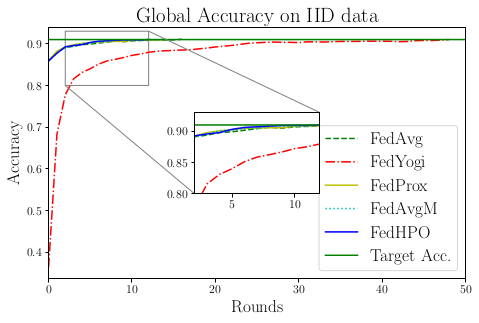

In [62]:
#iid data rounds vs accuracy
pgf_filename = 'iid_91_acc_rounds.pgf'
png_filename = 'iid_91_acc_rounds.png'
pdf_filename = 'iid_91_acc_rounds.pdf'

dataframe = iid_consolidated
fig, ax = plt.subplots(1,1,figsize=set_size(width))
ax.plot(dataframe['accuracy_fedavg'], color = 'g', label = 'FedAvg',linestyle='--')
ax.plot(dataframe['accuracy_fedyogi'], color = 'r', label = 'FedYogi',linestyle='-.')
ax.plot(dataframe['accuracy_fedprox'], color = 'y', label = 'FedProx',linestyle='-')
ax.plot(dataframe['accuracy_fedavgm'], color = 'c', label = 'FedAvgM',linestyle=':')
ax.plot(dataframe['accuracy_feddynam'],color = 'b', label = 'FedHPO',linestyle='solid')
plt.axhline(y=0.91,color='green',label= 'Target Acc.')
plt.title("Global Accuracy on IID data")

axins = zoomed_inset_axes(ax, 1.5, loc=10) # zoom = 6

axins.plot(dataframe['accuracy_fedavg'], color = 'g', label = 'FedAvg',linestyle='--')
axins.plot(dataframe['accuracy_fedyogi'], color = 'r', label = 'FedYogi',linestyle='-.')
axins.plot(dataframe['accuracy_fedprox'], color = 'y', label = 'FedProx',linestyle='-')
axins.plot(dataframe['accuracy_fedavgm'], color = 'c', label = 'FedAvgM',linestyle=':')
axins.plot(dataframe['accuracy_feddynam'],color = 'b', label = 'FedHPO',linestyle='solid')
plt.axhline(y=0.91,color='green')
# sub region of the original image that is to be zoomed 
x1, x2, y1, y2 = 2, 12, 0.8, 0.93
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=True)
plt.yticks(visible=True)
# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
    
ax.legend(loc = 'lower right')
ax.set_xlabel('Rounds')
ax.set_ylabel('Accuracy')
ax.set_xlim(0,50)
plt.show()
fig.savefig(os.path.join(IMAGES_DIR,pgf_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,png_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,pdf_filename),dpi= 300,bbox_inches='tight')

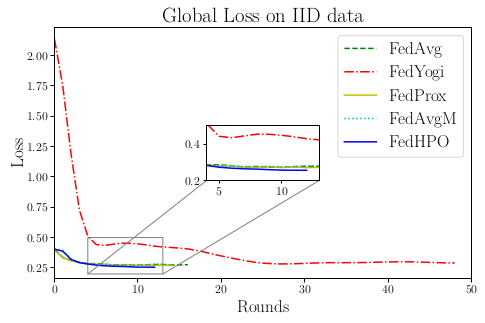

In [55]:
#iid data rounds vs loss
png_filename = 'iid_91_loss_rounds.png'
pdf_filename = 'iid_91_loss_rounds.pdf'
pgf_filename = 'iid_91_loss_rounds.pgf'

dataframe = iid_consolidated
fig, ax = plt.subplots(1,1,figsize=set_size(width))

ax.plot(dataframe['loss_fedavg'], color = 'g', label = 'FedAvg',linestyle='--')
ax.plot(dataframe['loss_fedyogi'], color = 'r', label = 'FedYogi',linestyle='-.')
ax.plot(dataframe['loss_fedprox'], color = 'y', label = 'FedProx',linestyle='-')
ax.plot(dataframe['loss_fedavgm'], color = 'c', label = 'FedAvgM',linestyle=':')
ax.plot(dataframe['loss_feddynam'],color = 'b', label = 'FedHPO',linestyle='-')
plt.title("Global Loss  on IID data")

axins = zoomed_inset_axes(ax, 1.5, loc=10) # zoom = 6

axins.plot(dataframe['loss_fedavg'], color = 'g', label = 'FedAvg',linestyle='--')
axins.plot(dataframe['loss_fedyogi'], color = 'r', label = 'FedYogi',linestyle='-.')
axins.plot(dataframe['loss_fedprox'], color = 'y', label = 'FedProx',linestyle='-')
axins.plot(dataframe['loss_fedavgm'], color = 'c', label = 'FedAvgM',linestyle=':')
axins.plot(dataframe['loss_feddynam'],color = 'b', label = 'FedHPO',linestyle='-')

# sub region of the original image that is to be zoomed 
x1, x2, y1, y2 = 4, 13, 0.20, 0.50
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=True)
plt.yticks(visible=True)
# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")
    
ax.legend(loc = 'upper right')
ax.set_xlabel('Rounds')
ax.set_ylabel('Loss')
ax.set_xlim(0,50)
# plt.show()
fig.savefig(os.path.join(IMAGES_DIR ,pgf_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,png_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,pdf_filename),dpi= 300,bbox_inches='tight')

In [26]:
plot_time_taken_line(iid_consolidated,'Time Taken over rounds for 91% Accuracy (IID Data)','iid_91_time_taken_line')

### feddynam Non-IID Data

##### one class niid

In [11]:
one_class_niid = pd.read_csv(ONE_CLASS_NIID_CONSOl)
one_class_niid.head()

,round,accuracy_feddynam,loss_feddynam,time_feddynam,accuracy_fedavg,loss_fedavg,time_fedavg,accuracy_fedyogi,loss_fedyogi,time_fedyogi,accuracy_fedadagrad,loss_fedadagrad,time_fedadagrad,accuracy_fedavgm,loss_fedavgm,time_fedavgm
0,1,0.1029,3.951016,52.327424,0.1010,3.258951,99.745635,0.0998,3.773359,65.156388,0.1027,2.342617,103.357352,0.1000,3.246211,95.136595
1,2,0.1576,3.506878,43.464765,0.1000,5.163949,67.422344,0.1983,5.426557,27.134563,0.1002,2.757133,54.156987,0.1000,10.352212,60.471367
2,3,0.1000,4.836790,30.244641,0.1000,5.218892,54.556589,0.1509,6.770407,23.990377,0.1632,2.486522,67.378484,0.1635,4.477572,67.233123
3,4,0.1741,3.238365,31.471283,0.1000,3.838059,60.396006,0.1000,10.067350,27.311094,0.1101,2.313780,83.766199,0.1000,4.322349,54.246159
4,5,0.1826,2.990698,25.499815,0.1057,4.175256,83.637753,0.1804,9.024311,23.581271,0.1947,2.754961,55.157581,0.1000,4.319013,68.315972


In [12]:
one_class_niid.shape

(1100, 16)

/tmp/ipykernel_214501/2773946607.py:42: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


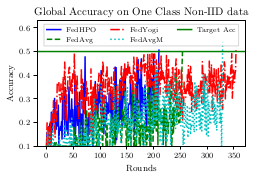

In [42]:
#one class niid  data rounds vs accuracy

pgf_filename = 'niid_one_class_acc_rounds.pgf'
png_filename = 'niid_one_class_acc_rounds.png'
pdf_filename = 'niid_one_class_acc_rounds.pdf'

dataframe = one_class_niid
fig, ax = plt.subplots(1,1,figsize=set_size(width))
ax.plot(dataframe['accuracy_feddynam'],color = 'b', label = 'FedHPO',linestyle='-')
ax.plot(dataframe['accuracy_fedavg'], color = 'g', label = 'FedAvg',linestyle='--')
ax.plot(dataframe['accuracy_fedyogi'], color = 'r', label = 'FedYogi',linestyle='-.')
# ax.plot(dataframe['accuracy_fedadagrad'], color = 'y', label = 'FedAdagrad')
ax.plot(dataframe['accuracy_fedavgm'], color = 'c', label = 'FedAvgM',linestyle=':')
plt.title("Global Accuracy on One Class Non-IID data")
plt.axhline(y=0.50,color='green',label= 'Target Acc')

# axins = zoomed_inset_axes(ax, 1.5, loc=10) # zoom = 6
# axins.plot(dataframe['accuracy_feddynam'],color = 'b', label = 'FedHPO',linestyle='-')
# axins.plot(dataframe['accuracy_fedavg'], color = 'g', label = 'FedAvg',linestyle='--')
# axins.plot(dataframe['accuracy_fedyogi'], color = 'r', label = 'FedYogi',linestyle='-.')
# axins.plot(dataframe['accuracy_fedadagrad'], color = 'y', label = 'FedAdagrad')
# axins.plot(dataframe['accuracy_fedavgm'], color = 'c', label = 'FedAvgM',linestyle=':')

# # sub region of the original image that is to be zoomed 
# x1, x2, y1, y2 = 0, 10, 0.77, 0.87
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)
# plt.xticks(visible=True)
# plt.yticks(visible=True)
# # draw a bbox of the region of the inset axes in the parent axes and
# # connecting lines between the bbox and the inset axes area
# mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
          ncol=3, fancybox=False, shadow=False)
# ax.legend(frameon=False)


ax.set_xlabel('Rounds')
ax.set_ylabel('Accuracy')
ax.set_ylim(0.099,0.63)
plt.show()
fig.savefig(os.path.join(IMAGES_DIR,'pgf',pgf_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,'png',png_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,'pdf',pdf_filename),dpi= 300,bbox_inches='tight')

In [30]:
#one class niid data rounds vs loss

pgf_filename = 'niid_one_class_loss_rounds.pgf'
png_filename = 'niid_one_class_loss_rounds.png'
pdf_filename = 'niid_one_class_loss_rounds.pdf'
dataframe = one_class_niid

fig, ax = plt.subplots(1,1,figsize=set_size(width))
ax.plot(dataframe['loss_feddynam'],color = 'b', label = 'FedHPO',linestyle='-')
ax.plot(dataframe['loss_fedavg'], color = 'g', label = 'FedAvg',linestyle='--')
ax.plot(dataframe['loss_fedyogi'], color = 'r', label = 'FedYogi',linestyle='-.')
# ax.plot(dataframe['loss_fedadagrad'], color = 'y', label = 'FedAdagrad')##### one class niid majority
ax.plot(dataframe['loss_fedavgm'], color = 'c', label = 'FedAvgM',linestyle=':')
plt.title("Global Loss on One Class Non-IID data")

# axins = zoomed_inset_axes(ax, 1.5, loc=10) # zoom = 6
# axins.plot(dataframe['loss_feddynam'],color = 'b', label = 'FedHPO',linestyle='-')
# axins.plot(dataframe['loss_fedavg'], color = 'g', label = 'FedAvg',linestyle='--')
# axins.plot(dataframe['loss_fedyogi'], color = 'r', label = 'FedYogi',linestyle='-.')
# axins.plot(dataframe['loss_fedadagrad'], color = 'y', label = 'FedAdagrad')
# axins.plot(dataframe['loss_fedavgm'], color = 'c', label = 'FedAvgM',linestyle=':')

# # sub region of the original image that is to be zoomed 
# x1, x2, y1, y2 = 0, 10, 0.40, 0.75
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)plot_time_taken(one_class_consol_majority,'Time Taken for 85% Accuracy one Class Majority NIID Data)','niid_one_class_maj_85_time_taken.png')
# plt.xticks(visible=True)
# plt.yticks(visible=True)
# # draw a bbox of the region of the inset axes in the parent axes and
# # connecting lines between the bbox and the inset axes area
# mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")
    
ax.legend(loc = 'upper right')
ax.set_xlabel('Rounds')
ax.set_ylabel('Loss')
# ax.set_xlim(0,300)
fig.savefig(os.path.join(IMAGES_DIR,'pgf',pgf_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,'png',png_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,'pdf',pdf_filename),dpi= 300,bbox_inches='tight')

In [31]:
plot_time_taken(one_class_niid,'Time Taken for 50% Accuracy one Class NIID Data)','niid_one_class_time_taken')

In [32]:
plot_time_taken_line(one_class_niid,'Time Taken for 50% Accuracy one Class NIID Data)','niid_one_class_time_taken_line')

##### one class niid majority

In [56]:
one_class_consol_majority = pd.read_csv(ONE_CLASS_NIID_CONSOl_MAJORITY)
one_class_consol_majority.head()

,round,accuracy_feddynam,loss_feddynam,time_feddynam,accuracy_fedavg,loss_fedavg,time_fedavg,accuracy_fedyogi,loss_fedyogi,time_fedyogi,accuracy_fedadagrad,loss_fedadagrad,time_fedadagrad,accuracy_fedavgm,loss_fedavgm,time_fedavgm,accuracy_fedprox,loss_fedprox,time_fedprox
0,1,0.80100,0.605455,62.820497,0.4442,1.688477,85.019037,0.4695,2.166973,102.988729,0.5312,2.130661,68.687621,0.8010,0.605455,62.820497,0.8000,0.586200,101.380994
1,2,0.84390,0.521955,69.857861,0.7901,0.631942,29.659491,0.6958,1.813857,57.390464,0.6599,1.885962,70.102599,0.8339,0.521955,69.857861,0.8291,0.490154,55.274971
2,3,0.84860,0.554144,46.029105,0.8116,0.596937,27.826154,0.7754,1.204327,44.757614,0.7183,1.654068,54.334268,0.8406,0.554144,46.029105,0.8415,0.521809,63.703553
3,4,0.84905,0.552448,42.704622,0.8143,0.679169,31.716658,0.7985,0.712985,45.653874,0.7631,1.442181,70.462693,0.8425,0.552448,42.704622,0.8428,0.559053,66.788828
4,5,0.85190,0.540763,56.907559,0.8095,0.777329,29.948471,0.8105,0.529574,57.649324,0.7901,1.271064,70.322831,0.8459,0.550063,56.907559,0.8487,0.546854,55.177411


/tmp/ipykernel_14453/97559511.py:39: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


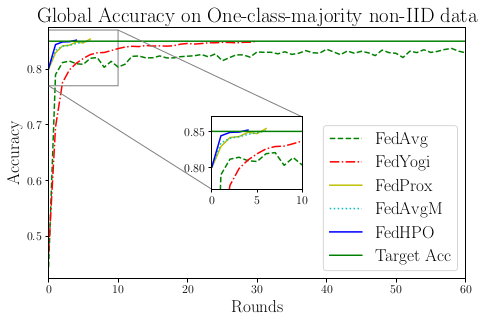

In [64]:
#one class niid majority data data rounds vs accuracy

pgf_filename = 'niid_one_class_maj_85_acc_rounds.pgf'
png_filename = 'niid_one_class_maj_85_acc_rounds.png'
pdf_filename = 'niid_one_class_maj_85_acc_rounds.pdf'

dataframe = one_class_consol_majority
fig, ax = plt.subplots(1,1,figsize=set_size(width))
ax.plot(dataframe['accuracy_fedavg'], color = 'g', label = 'FedAvg',linestyle='--')
ax.plot(dataframe['accuracy_fedyogi'], color = 'r', label = 'FedYogi',linestyle='-.')
ax.plot(dataframe['accuracy_fedprox'], color = 'y', label = 'FedProx',linestyle='-')
ax.plot(dataframe['accuracy_fedavgm'], color = 'c', label = 'FedAvgM',linestyle=':')
ax.plot(dataframe['accuracy_feddynam'],color = 'b', label = 'FedHPO',linestyle='-')
plt.axhline(y=0.85,color='green',label= 'Target Acc')
plt.title("Global Accuracy on One-class-majority non-IID data")

axins = zoomed_inset_axes(ax, 1.3, loc=10) # zoom = 6
axins.plot(dataframe['accuracy_fedavg'], color = 'g', label = 'FedAvg',linestyle='--')
axins.plot(dataframe['accuracy_fedyogi'], color = 'r', label = 'FedYogi',linestyle='-.')
axins.plot(dataframe['accuracy_fedprox'], color = 'y', label = 'FedProx',linestyle='-')
# axins.plot(dataframe['accuracy_fedadagrad'], color = 'y', label = 'FedAdagrad')
axins.plot(dataframe['accuracy_fedavgm'], color = 'c', label = 'FedAvgM',linestyle=':')
axins.plot(dataframe['accuracy_feddynam'],color = 'b', label = 'FedHPO',linestyle='-')
plt.axhline(y=0.85,color='green',label= 'Target Acc.')
# sub region of the original image that is to be zoomed 
x1, x2, y1, y2 = 0, 10, 0.77, 0.87
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=True)
plt.yticks(visible=True)
# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
    
ax.legend(loc = 'lower right',ncol=1)
ax.set_xlabel('Rounds')
ax.set_ylabel('Accuracy')
ax.set_xlim(0,60)
plt.show()
fig.savefig(os.path.join(IMAGES_DIR,pgf_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,png_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,pdf_filename),dpi= 300,bbox_inches='tight')

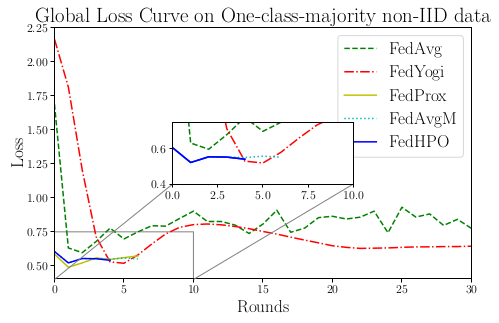

In [58]:
#one class niid majority data data rounds vs loss

pgf_filename = 'niid_one_class_maj_85_loss_rounds.pgf'
png_filename = 'niid_one_class_maj_85_loss_rounds.png'
pdf_filename = 'niid_one_class_maj_85_loss_rounds.pdf'

dataframe = one_class_consol_majority

fig, ax = plt.subplots(1,1,figsize=set_size(width))

ax.plot(dataframe['loss_fedavg'], color = 'g', label = 'FedAvg',linestyle='--')
ax.plot(dataframe['loss_fedyogi'], color = 'r', label = 'FedYogi',linestyle='-.')
ax.plot(dataframe['loss_fedprox'], color = 'y', label = 'FedProx',linestyle='-')
# ax.plot(dataframe['loss_fedadagrad'], color = 'y', label = 'FedAdagrad')##### one class niid majority
ax.plot(dataframe['loss_fedavgm'], color = 'c', label = 'FedAvgM',linestyle=':')
ax.plot(dataframe['loss_feddynam'],color = 'b', label = 'FedHPO',linestyle='-')
plt.title("Global Loss Curve on One-class-majority non-IID data")

axins = zoomed_inset_axes(ax, 1.3, loc=10) # zoom = 6
axins.plot(dataframe['loss_feddynam'],color = 'b', label = 'FedHPO',linestyle='-')
axins.plot(dataframe['loss_fedavg'], color = 'g', label = 'FedAvg',linestyle='--')
axins.plot(dataframe['loss_fedyogi'], color = 'r', label = 'FedYogi',linestyle='-.')
# axins.plot(dataframe['loss_fedadagrad'], color = 'y', label = 'FedAdagrad')
axins.plot(dataframe['loss_fedavgm'], color = 'c', label = 'FedAvgM',linestyle=':')
axins.plot(dataframe['loss_feddynam'],color = 'b', label = 'FedHPO',linestyle='-')

# sub region of the original image that is to be zoomed 
x1, x2, y1, y2 = 0, 10, 0.40, 0.75
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
plt.xticks(visible=True)
plt.yticks(visible=True)
# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")
    
ax.legend(loc = 'upper right')
ax.set_xlabel('Rounds')
ax.set_ylabel('Loss')
ax.set_xlim(0,30)
fig.savefig(os.path.join(IMAGES_DIR,pgf_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,png_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,pdf_filename),dpi= 300,bbox_inches='tight')

In [36]:
plot_time_taken(one_class_consol_majority,'Time Taken for 85% Accuracy one Class Majority NIID Data)','niid_one_class_maj_85_time_taken')

##### Two Class NIID

In [59]:
two_class_consolidated = pd.read_csv(TWO_CLASS_NIID_CONSOl)
two_class_consolidated.head()

,round,accuracy_feddynam,loss_feddynam,time_feddynam,accuracy_fedavg,loss_fedavg,time_fedavg,accuracy_fedyogi,loss_fedyogi,time_fedyogi,accuracy_fedadagrad,loss_fedadagrad,time_fedadagrad,accuracy_fedavgm,loss_fedavgm,time_fedavgm,accuracy_fedprox,loss_fedprox,time_fedprox
0,1,0.2101,2.405024,84.474368,0.1974,2.097539,57.136641,0.2979,2.224295,118.321959,0.1504,2.347120,129.033938,0.2410,2.282003,129.362014,0.3119,2.074597,67.212497
1,2,0.2761,3.506025,32.614997,0.3854,1.868544,36.698590,0.2882,2.118732,67.734100,0.1018,2.303769,83.646120,0.2874,3.939752,54.156675,0.2342,4.129785,66.012227
2,3,0.3371,2.862763,38.322596,0.3661,1.786157,32.621892,0.3629,2.009060,60.231733,0.1636,2.144576,82.495693,0.3008,3.656860,83.797873,0.3687,2.287140,53.418386
3,4,0.3496,2.535939,35.724677,0.2732,2.857467,38.247905,0.4126,2.005628,67.844812,0.2177,2.050441,67.505175,0.3508,2.764311,67.179666,0.2413,4.152243,78.796062
4,5,0.4818,1.808962,35.496695,0.2902,3.214140,38.479562,0.4771,2.155007,67.841218,0.3555,2.043882,54.209108,0.3255,3.525784,143.889649,0.3525,2.604259,65.753004


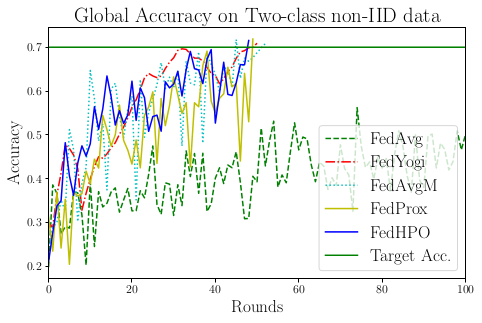

In [65]:
#Two class niid data rounds vs accuracy

pgf_filename = 'niid_two_class_70_acc_rounds.pgf'
png_filename = 'niid_two_class_70_acc_rounds.png'
pdf_filename = 'niid_two_class_70_acc_rounds.pdf'

dataframe = two_class_consolidated
fig, ax = plt.subplots(1,1,figsize=set_size(width))
ax.plot(dataframe['accuracy_fedavg'], color = 'g', label = 'FedAvg',linestyle='--')
ax.plot(dataframe['accuracy_fedyogi'], color = 'r', label = 'FedYogi',linestyle='-.')
# ax.plot(dataframe['accuracy_fedadagrad'], color = 'y', label = 'FedAdagrad')
ax.plot(dataframe['accuracy_fedavgm'], color = 'c', label = 'FedAvgM',linestyle=':')
ax.plot(dataframe['accuracy_fedprox'], color = 'y', label = 'FedProx',linestyle='-')
ax.plot(dataframe['accuracy_feddynam'],color = 'b', label = 'FedHPO',linestyle='-')
plt.title("Global Accuracy on Two-class non-IID data")
plt.axhline(y=0.70,color='green',label= 'Target Acc.')
# axins = zoomed_inset_axes(ax, 1.5, loc=10) # zoom = 6
# axins.plot(dataframe['accuracy_feddynam'],color = 'b', label = 'FedHPO',linestyle='-')
# axins.plot(dataframe['accuracy_fedavg'], color = 'g', label = 'FedAvg',linestyle='--')
# axins.plot(dataframe['accuracy_fedyogi'], color = 'r', label = 'FedYogi',linestyle='-.')
## axins.plot(dataframe['accuracy_fedadagrad'], color = 'y', label = 'FedAdagrad')
# axins.plot(dataframe['accuracy_fedavgm'], color = 'c', label = 'FedAvgM',linestyle=':')

# # sub region of the original image that is to be zoomed 
# x1, x2, y1, y2 = 0, 10, 0.77, 0.87
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)
# plt.xticks(visible=True)
# plt.yticks(visible=True)
# # draw a bbox of the region of the inset axes in the parent axes and
# # connecting lines between the bbox and the inset axes area
# mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")
    
ax.legend(loc = 'lower right')
ax.set_xlabel('Rounds')
ax.set_ylabel('Accuracy')
ax.set_xlim(0,100)
fig.savefig(os.path.join(IMAGES_DIR,pgf_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,png_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,pdf_filename),dpi= 300,bbox_inches='tight')

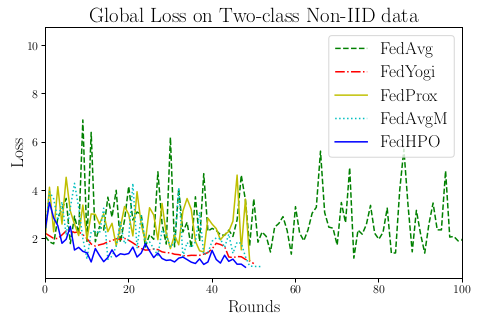

In [61]:
#two class niid  data data rounds vs loss

pgf_filename = 'niid_two_class_70_loss_rounds.pgf'
png_filename = 'niid_two_class_70_loss_rounds.png'
pdf_filename = 'niid_two_class_70_loss_rounds.pdf'

dataframe = two_class_consolidated

fig, ax = plt.subplots(1,1,figsize=set_size(width))
ax.plot(dataframe['loss_fedavg'], color = 'g', label = 'FedAvg',linestyle='--')
ax.plot(dataframe['loss_fedyogi'], color = 'r', label = 'FedYogi',linestyle='-.')
# ax.plot(dataframe['loss_fedadagrad'], color = 'y', label = 'FedAdagrad')##### one class niid majority
ax.plot(dataframe['loss_fedprox'], color = 'y', label = 'FedProx',linestyle='-')
ax.plot(dataframe['loss_fedavgm'], color = 'c', label = 'FedAvgM',linestyle=':')
ax.plot(dataframe['loss_feddynam'],color = 'b', label = 'FedHPO',linestyle='-')
plt.title("Global Loss on Two-class Non-IID data")

# axins = zoomed_inset_axes(ax, 1.5, loc=10) # zoom = 6
# axins.plot(dataframe['loss_feddynam'],color = 'b', label = 'FedHPO',linestyle='-')
# axins.plot(dataframe['loss_fedavg'], color = 'g', label = 'FedAvg',linestyle='--')
# axins.plot(dataframe['loss_fedyogi'], color = 'r', label = 'FedYogi',linestyle='-.')
# axins.plot(dataframe['loss_fedadagrad'], color = 'y', label = 'FedAdagrad')
# axins.plot(dataframe['loss_fedavgm'], color = 'c', label = 'FedAvgM',linestyle=':')

# # sub region of the original image that is to be zoomed 
# x1, x2, y1, y2 = 0, 10, 0.40, 0.75
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)
# plt.xticks(visible=True)
# plt.yticks(visible=True)
# # draw a bbox of the region of the inset axes in the parent axes and
# # connecting lines between the bbox and the inset axes area
# mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")
    
ax.legend(loc = 'upper right')
ax.set_xlabel('Rounds')
ax.set_ylabel('Loss')
ax.set_xlim(0,100)
fig.savefig(os.path.join(IMAGES_DIR,pgf_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,png_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,pdf_filename),dpi= 300,bbox_inches='tight')

In [32]:
plot_time_taken(two_class_consolidated,'Time Taken for 70% Accuracy Two Class NIID Data)','niid_two_class_70_time_taken')

### old code

In [9]:
def plot_rounds_loss(dataframe,plt_title):

    #plot loss and accuracy over rounds

    fig, ax = plt.subplots(figsize=(30, 12))
    # ax.set_xlim(600,1100)
    # ax.xaxis.set_ticks(np.arange(0, 1100, 100))
    ax.plot(dataframe['loss_fedavg'], color = 'green', label = 'FedAvg')
    ax.plot(dataframe['loss_fedavg_hpo'], color = 'green', label = 'FedAvg HPO', linestyle = '--')

    ax.plot(dataframe['loss_fedyogi'], color = 'blue', label = 'FedYogi')
    ax.plot(dataframe['loss_fedyogi_hpo'], color = 'blue', label = 'FedYogi HPO', linestyle = '--')

    ax.plot(dataframe['loss_fedadagrad'], color = 'red', label = 'FedAdagrad')
    ax.plot(dataframe['loss_fedadagrad_hpo'], color = 'red', label = 'FedAdagrad HPO', linestyle = '--')

    ax.plot(dataframe['loss_fedavgm'], color = 'violet', label = 'FedAvgM')
    ax.plot(dataframe['loss_fedavgm_hpo'], color = 'violet', label = 'FedAvgM HPO', linestyle = '--')
    ax.set_xscale('log')
    # ax.set_xticks(ticks)
    # ax.set_xticklabels(ticks)

    ax.legend(loc = 'upper left')
    ax.set_xlabel('Rounds')
    ax.set_ylabel('Loss')
    plt.title(plt_title)
    plt.show()

### Prof comment 1

In [5]:
data_dir = './out/final_data/prof_comment/'

consol_91_per_file = os.path.join(data_dir,'91_per_consol.csv')

In [6]:
consol_91_data = pd.read_csv(consol_91_per_file)
consol_91_data.head()

,round,nhpo_accuracy,nhpo_loss,nhpo_time,hpo_lr_accuracy,hpo_lr_loss,hpo_lr_time,hpo_es_accuracy,hpo_es_loss,hpo_es_time,hpo_es_lr_accuracy,hpo_es_lr_loss,hpo_es_lr_time
0,1,0.8652,0.390797,155.976276,0.8688,0.383852,151.990660,0.8640,0.393149,97.026116,0.8613,0.388949,88.774397
1,2,0.8856,0.323927,67.340342,0.8886,0.323193,92.151249,0.8860,0.322544,91.797062,0.8843,0.326567,64.290272
2,3,0.8940,0.296783,83.378521,0.8959,0.300217,69.148881,0.8956,0.297579,76.034349,0.8955,0.302522,67.872183
3,4,0.9000,0.282852,83.558768,0.9020,0.285463,97.769769,0.9012,0.291622,76.012802,0.8994,0.290764,60.015057
4,5,0.9019,0.277379,50.074524,0.9029,0.275789,92.477558,0.9022,0.281485,92.363422,0.9002,0.282339,56.273193


In [7]:
consol_91_data.shape

(100, 13)

In [11]:
def plot_rounds_loss(dataframe,plt_title):

    #plot loss and accuracy over rounds
    pgf_filename = '91_per_loss_rounds.pgf'
    png_filename = '91_per_loss_rounds.png'
    pdf_filename = '91_per_loss_rounds.pdf'
    
    fig, ax = plt.subplots(1,1,figsize=set_size(500))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    # ax.set_xlim(600,1100)
    # ax.xaxis.set_ticks(np.arange(0, 1100, 100))
    ax.plot(dataframe['round'],dataframe['nhpo_loss'], color = 'r', label = 'Loss Without HPO',marker='*')
    ax.plot(dataframe['round'],dataframe['hpo_es_loss'], color = 'g', label = 'Loss With Adaptive Epoch Size', marker='+')
    ax.plot(dataframe['round'],dataframe['hpo_lr_loss'], color = 'c', label = 'Loss With Adaptive Learning Rate',marker='o')
    ax.plot(dataframe['round'],dataframe['hpo_es_lr_loss'], color = 'b', label = 'Loss With Adaptive Epoch size + Learning Rate', marker='v')

    plt.xticks(np.arange(0, 105, 5))
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
          ncol=2, fancybox=False, shadow=False)
    # ax.legend(loc = 'upper right')
    ax.set_xlabel('Rounds')
    ax.set_ylabel('Loss')
    plt.title(plt_title)
    plt.show()
#     fig.savefig(os.path.join(IMAGES_DIR,'pgf',pgf_filename),dpi= 300,bbox_inches='tight')
#     fig.savefig(os.path.join(IMAGES_DIR,'png',png_filename),dpi= 300,bbox_inches='tight')
#     fig.savefig(os.path.join(IMAGES_DIR,'pdf',pdf_filename),dpi= 300,bbox_inches='tight')

In [15]:
def plot_rounds_acc(dataframe,plt_title):

    #plot loss and accuracy over rounds
    pgf_filename = '91_per_acc_rounds.pgf'
    png_filename = '91_per_acc_rounds.png'
    pdf_filename = '91_per_acc_rounds.pdf'


    fig, ax = plt.subplots(1,1,figsize=set_size(700))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    # ax.xaxis.set_ticks(np.arange(0, 1100, 100))
    ax.plot(dataframe['round'],dataframe['nhpo_accuracy'], color = 'r', label = 'Accuracy Without HPO',marker='*')
    ax.plot(dataframe['round'],dataframe['hpo_es_accuracy'], color = 'g', label = 'Accuracy With Adaptive Epoch Size', marker='+')

    ax.plot(dataframe['round'],dataframe['hpo_lr_accuracy'], color = 'c', label = 'Accuracy With Adaptive Learning Rate',marker='o')
    ax.plot(dataframe['round'],dataframe['hpo_es_lr_accuracy'], color = 'b', label = 'Accuracy With Adaptive Epoch size + Learning Rate', marker='v')
    plt.axhline(y=0.91,color='green',label= 'Target Acc.')
    plt.xticks(np.arange(0, 105, 5))
    ax.legend(loc = 'lower right')
    ax.set_xlabel('Rounds')
    ax.set_ylabel('Accuracy')
    plt.title(plt_title)
    # fig.savefig(os.path.join(IMAGES_DIR,'png',png_filename),dpi= 300,bbox_inches='tight')
    # fig.savefig(os.path.join(IMAGES_DIR,'pdf',pdf_filename),dpi= 300,bbox_inches='tight')
    # fig.savefig(os.path.join(IMAGES_DIR,'pgf',pgf_filename),dpi= 300,bbox_inches='tight')
    plt.show()

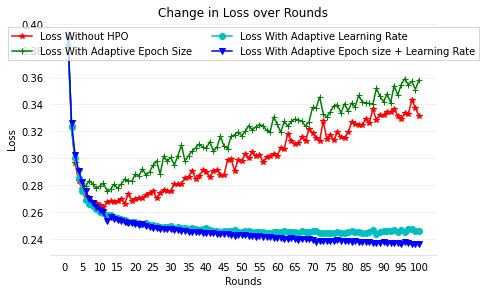

In [13]:
plot_rounds_loss(consol_91_data,'Change in Loss over Rounds')

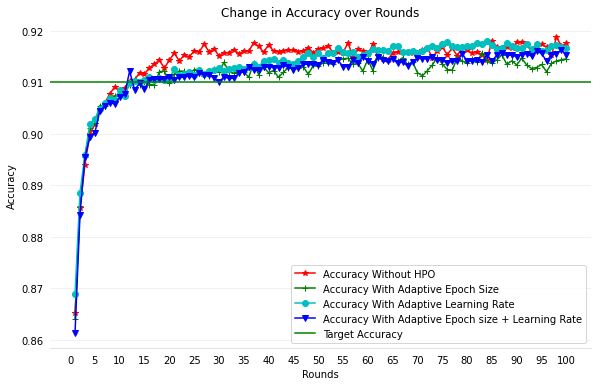

In [16]:
plot_rounds_acc(consol_91_data,'Change in Accuracy over Rounds')

### Plot Model Architecture

In [17]:
from tensorflow import keras


2022-08-19 14:45:23.239212: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-19 14:45:23.285914: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-19 14:45:23.285963: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [18]:
model = keras.models.load_model('./saved_model/')

2022-08-19 14:45:40.297871: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-08-19 14:45:40.297889: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mak-Z690): /proc/driver/nvidia/version does not exist
2022-08-19 14:45:40.298094: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

### FedHPO on IID data

#### 3D Scatter Plot

In [69]:
#take one random client 
fedhpo_iid_df = pd.read_csv("/home/mak36/Desktop/curr_work/FedHPO/out/graph_test/fedhpo/iid/clients/10-42-36_client_11.csv")
fedhpo_iid_df.head()

,round,epoch,accuracy,loss,lr,val_accuracy,val_loss
0,1,1,0.612353,1.075149,0.001,0.741111,0.693549
1,1,2,0.764510,0.624257,0.001,0.787778,0.570306
2,1,3,0.792353,0.544446,0.001,0.793333,0.552372
3,1,4,0.812353,0.489008,0.001,0.822222,0.492603
4,1,5,0.831961,0.459968,0.001,0.827778,0.472184


In [70]:
metrics_to_plot ='loss'

rounds = fedhpo_iid_df['round']
epochs = fedhpo_iid_df['epoch']
lr = fedhpo_iid_df['lr']
metrics = fedhpo_iid_df[metrics_to_plot]

/tmp/ipykernel_670016/3361725070.py:22: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


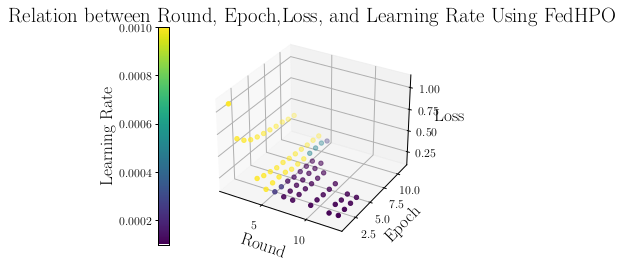

In [49]:
pgf_filename = 'fedhpo_scatterplot_iid.pgf'
png_filename = 'fedhpo_scatterplot_iid.png'
pdf_filename = 'fedhpo_scatterplot_iid.pdf'

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the relation between round, epoch, accuracy, and lr
scatter = ax.scatter(rounds, epochs, metrics, c=lr, cmap='viridis')
# Add a colorbar
cbar = fig.colorbar(scatter,location='left')
# cbar = fig.colorbar(scatter)
cbar.set_label('Learning Rate')
# Set labels and title
ax.set_xlabel('Round')
ax.set_ylabel('Epoch')
ax.set_zlabel(metrics_to_plot.capitalize())
ax.set_title(f'Relation between Round, Epoch,{metrics_to_plot.capitalize()}, and Learning Rate Using FedHPO' )

# Show the plot
plt.show()

fig.savefig(os.path.join(IMAGES_DIR,pgf_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,png_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,pdf_filename),dpi= 300,bbox_inches='tight')

#### Line Plot

In [71]:
rnds = rounds.unique()
accuracies = []
learning_rates = []
max_epochs = []
losses = []
val_losses = []
for rnd in rnds:
    fv = list(fedhpo_iid_df.loc[fedhpo_iid_df['round'] == rnd, 'accuracy'])
    acc = fv[-1]
    fv = list(fedhpo_iid_df.loc[fedhpo_iid_df['round'] == rnd, 'lr'])
    lr = fv[-1]
    fv = list(fedhpo_iid_df.loc[fedhpo_iid_df['round'] == rnd, 'epoch'])
    epoch = fv[-1]
    fv = list(fedhpo_iid_df.loc[fedhpo_iid_df['round'] == rnd, 'loss'])
    loss = fv[-1]
    fv = list(fedhpo_iid_df.loc[fedhpo_iid_df['round'] == rnd, 'val_loss'])
    val_loss = fv[-1]
    accuracies.append(acc)
    learning_rates.append(lr)
    max_epochs.append(epoch)
    losses.append(loss)
    val_losses.append(val_loss)
    print(f"Round : {rnd} Max Epochs : {epoch} Accuracy : {acc}, Lr : {lr}")

Round : 1 Max Epochs : 11 Accuracy : 0.870196104049683, Lr : 0.001
Round : 4 Max Epochs : 11 Accuracy : 0.931176483631134, Lr : 0.001
Round : 5 Max Epochs : 11 Accuracy : 0.938235282897949, Lr : 0.00025
Round : 6 Max Epochs : 7 Accuracy : 0.928039193153381, Lr : 0.0001
Round : 7 Max Epochs : 7 Accuracy : 0.924509823322296, Lr : 0.0001
Round : 8 Max Epochs : 6 Accuracy : 0.931764721870422, Lr : 0.0001
Round : 10 Max Epochs : 5 Accuracy : 0.928823530673981, Lr : 0.0001
Round : 12 Max Epochs : 4 Accuracy : 0.928039193153381, Lr : 0.0001
Round : 13 Max Epochs : 4 Accuracy : 0.933684285068512, Lr : 0.0001


/tmp/ipykernel_670016/3346336314.py:30: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


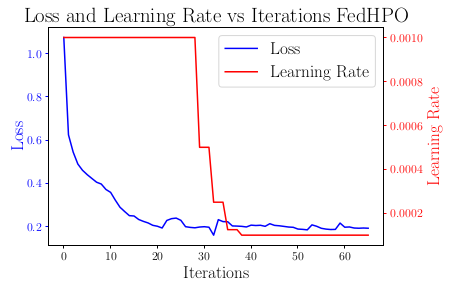

In [51]:
pgf_filename = 'fedhpo_loss_lr_iterations_iid.pgf'
png_filename = 'fedhpo_loss_lr_iterations_iid.png'
pdf_filename = 'fedhpo_loss_lr_iterations_iid.pdf'

# Create the figure and axes
show_to_index = len(rounds)
fig, ax1 = plt.subplots()
len_x = range(0,show_to_index)
# Plot accuracy on the first y-axis
ax1.plot(len_x, fedhpo_iid_df.loss[:show_to_index], color='blue', marker='')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for learning rate
ax2 = ax1.twinx()
ax2.plot(len_x, fedhpo_iid_df.lr[:show_to_index], color='red', marker='')
ax2.set_ylabel('Learning Rate', color='red')
ax2.tick_params('y', colors='red')

# Add a legend
lines = ax1.get_lines() + ax2.get_lines()
labels = ['Loss', 'Learning Rate']
ax1.legend(lines, labels, loc='best')

# Set the title
plt.title('Loss and Learning Rate vs Iterations FedHPO')

# Show the plot
plt.show()
fig.savefig(os.path.join(IMAGES_DIR,pgf_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,png_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,pdf_filename),dpi= 300,bbox_inches='tight')

#### Candle sticks boxplot rounds epochs

/tmp/ipykernel_670016/608250756.py:27: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


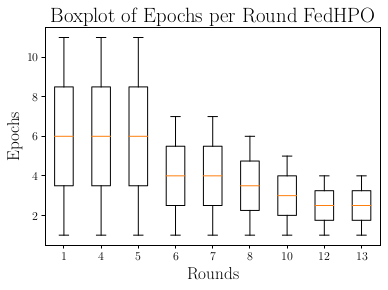

In [52]:
pgf_filename = 'fedhpo_round_epochs_boxplot_iid.pgf'
png_filename = 'fedhpo_round_epochs_boxplot_iid.png'
pdf_filename = 'fedhpo_round_epochs_boxplot_iid.pdf'
rnds_s = rnds
epochs_s = []
for e in max_epochs:
    l = list(range(1,e+1))
    epochs_s.append(l)
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the boxplot
ax.boxplot(epochs_s)

# Set the x-axis ticks and labels
# ax.set_xticks([1])  # Adjust the x-axis position if needed
ax.set_xticklabels(rnds_s)

# Set the axis labels
ax.set_xlabel('Rounds')
ax.set_ylabel('Epochs')

# Set the plot title
ax.set_title('Boxplot of Epochs per Round FedHPO')

# Show the plot
plt.show()
fig.savefig(os.path.join(IMAGES_DIR,pgf_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,png_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,pdf_filename),dpi= 300,bbox_inches='tight')


#### Heatmap FedHPO

/tmp/ipykernel_670016/283305432.py:40: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


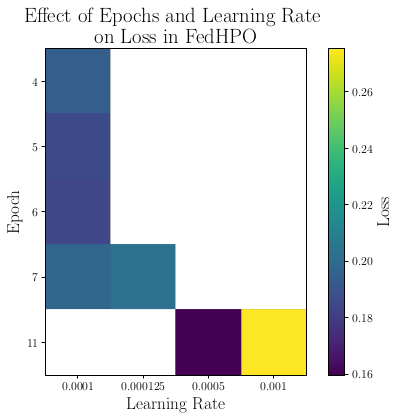

In [74]:
pgf_filename = 'fedhpo_heatmap_iid.pgf'
png_filename = 'fedhpo_heatmap_iid.png'
pdf_filename = 'fedhpo_heatmap_iid.pdf'
lrs = learning_rates
lrs[2] = 0.0005
lrs[4] = 0.000125
data = {
    'epoch': max_epochs,
    'lr': lrs,
    'accuracy': accuracies,
    'val_loss' : val_losses,
    'loss' : losses,

}
df = pd.DataFrame(data)
# Aggregate the data by taking the mean accuracy for each unique combination of epoch and lr
df_agg = df.groupby(['epoch', 'lr']).mean().reset_index()

# Pivot the aggregated data to create a matrix of accuracy values
pivot_table = df_agg.pivot('epoch', 'lr', 'loss')

# Create the heatmap plot
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.imshow(pivot_table, cmap='viridis')

# Set the plot labels and titles
ax.set_xticks(np.arange(len(df_agg['lr'].unique())))
ax.set_yticks(np.arange(len(df_agg['epoch'].unique())))
ax.set_xticklabels(df_agg['lr'].unique())
ax.set_yticklabels(df_agg['epoch'].unique())
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Epoch')
ax.set_title('Effect of Epochs and Learning Rate \n on Loss in FedHPO')

# Add colorbar
cbar = plt.colorbar(heatmap)
cbar.set_label('Loss')

# Display the plot
plt.show()
fig.savefig(os.path.join(IMAGES_DIR,pgf_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,png_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,pdf_filename),dpi= 300,bbox_inches='tight')


### FedAvg on IID data

#### 3D Scatter plot

In [75]:
#take one random client 
fedavg_iid_df = pd.read_csv("/home/mak36/Desktop/curr_work/FedHPO/out/2023-05-12/nhpo/fedavg/iid/0/clients/client_0.csv")
fedavg_iid_df.head()

,epoch,accuracy,loss,lr,round,val_accuracy,val_loss
0,0,0.626863,1.055162,0.001,1,0.763333,0.660172
1,1,0.774314,0.616384,0.001,1,0.778889,0.576201
2,2,0.808235,0.529884,0.001,1,0.813333,0.531426
3,3,0.820980,0.488805,0.001,1,0.810000,0.498926
4,4,0.833529,0.451016,0.001,1,0.826667,0.481209


In [76]:
metrics_to_plot ='loss'

rounds = fedavg_iid_df['round']
epochs = fedavg_iid_df['epoch']
lr = fedavg_iid_df['lr']
metrics = fedavg_iid_df[metrics_to_plot]

/tmp/ipykernel_670016/1596742636.py:21: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


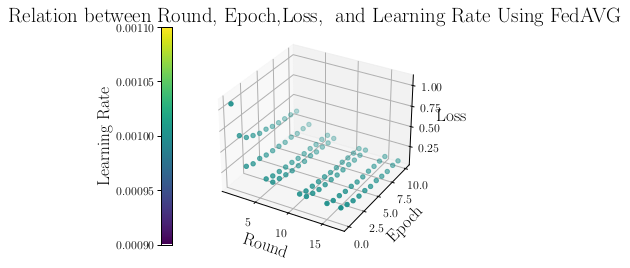

In [58]:
pgf_filename = 'fedavg_scatterplot_iid.pgf'
png_filename = 'fedavg_scatterplot_iid.png'
pdf_filename = 'fedavg_scatterplot_iid.pdf'
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the relation between round, epoch, accuracy, and lr
scatter = ax.scatter(rounds, epochs, metrics, c=lr, cmap='viridis')
# Add a colorbar
cbar = fig.colorbar(scatter,location='left')
# cbar = fig.colorbar(scatter)
cbar.set_label('Learning Rate')
# Set labels and title
ax.set_xlabel('Round')
ax.set_ylabel('Epoch')
ax.set_zlabel(metrics_to_plot.capitalize())
ax.set_title(f'Relation between Round, Epoch,{ metrics_to_plot.capitalize()},and Learning Rate Using FedAVG')

# Show the plot
plt.show()
fig.savefig(os.path.join(IMAGES_DIR,pgf_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,png_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,pdf_filename),dpi= 300,bbox_inches='tight')

#### Line Plot

In [77]:

rnds = rounds.unique()
accuracies = []
learning_rates = []
max_epochs = []
losses = []
val_losses = []
for rnd in rnds:
    fv = list(fedavg_iid_df.loc[fedavg_iid_df['round'] == rnd, 'accuracy'])
    acc = fv[-1]
    fv = list(fedavg_iid_df.loc[fedavg_iid_df['round'] == rnd, 'lr'])
    lr = fv[-1]
    fv = list(fedavg_iid_df.loc[fedavg_iid_df['round'] == rnd, 'epoch'])
    epoch = fv[-1]
    fv = list(fedavg_iid_df.loc[fedavg_iid_df['round'] == rnd, 'loss'])
    loss = fv[-1]
    fv = list(fedavg_iid_df.loc[fedavg_iid_df['round'] == rnd, 'val_loss'])
    val_loss = fv[-1]
    accuracies.append(acc)
    learning_rates.append(lr)
    max_epochs.append(epoch)
    losses.append(loss)
    val_losses.append(val_loss)
    print(f"Round : {rnd} Max Epochs : {epoch} Accuracy : {acc}, Lr : {lr}")

Round : 1 Max Epochs : 10 Accuracy : 0.8705882430076599, Lr : 0.001
Round : 3 Max Epochs : 10 Accuracy : 0.9182353019714355, Lr : 0.001
Round : 6 Max Epochs : 10 Accuracy : 0.9427450895309448, Lr : 0.001
Round : 7 Max Epochs : 10 Accuracy : 0.9480392336845398, Lr : 0.001
Round : 11 Max Epochs : 10 Accuracy : 0.9645097851753236, Lr : 0.001
Round : 12 Max Epochs : 10 Accuracy : 0.9596078395843506, Lr : 0.001
Round : 15 Max Epochs : 10 Accuracy : 0.9647058844566344, Lr : 0.001
Round : 17 Max Epochs : 10 Accuracy : 0.9678431153297424, Lr : 0.001


/tmp/ipykernel_670016/486143730.py:29: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


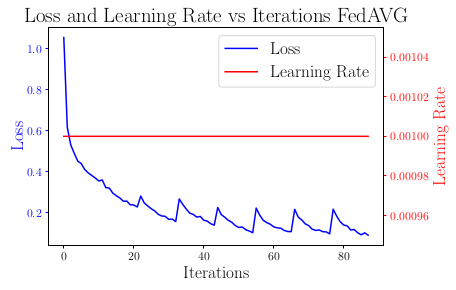

In [61]:
pgf_filename = 'fedavg_lineplot_iid.pgf'
png_filename = 'fedavg_lineplot_iid.pgf.png'
pdf_filename = 'fedavg_lineplot_iid.pgf.pdf'
# Create the figure and axes
show_to_index = 88
fig, ax1 = plt.subplots()
len_x = range(0,show_to_index)
# Plot accuracy on the first y-axis
ax1.plot(len_x, fedavg_iid_df.loss[:show_to_index], color='blue', marker='')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for learning rate
ax2 = ax1.twinx()
ax2.plot(len_x, fedavg_iid_df.lr[:show_to_index], color='red', marker='')
ax2.set_ylabel('Learning Rate', color='red')
ax2.tick_params('y', colors='red')

# Add a legend
lines = ax1.get_lines() + ax2.get_lines()
labels = ['Loss', 'Learning Rate']
ax1.legend(lines, labels, loc='best')

# Set the title
plt.title('Loss and Learning Rate vs Iterations FedAVG')

# Show the plot
plt.show()
fig.savefig(os.path.join(IMAGES_DIR,pgf_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,png_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,pdf_filename),dpi= 300,bbox_inches='tight')

#### Candle sticks boxplot rounds epochs

/tmp/ipykernel_670016/1373762985.py:27: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


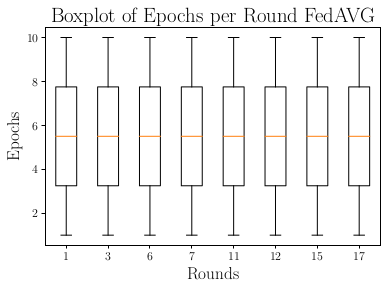

In [62]:
pgf_filename = 'fedavg_candlesticks_iid.pgf'
png_filename = 'fedavg_candlesticks_iid.png'
pdf_filename = 'fedavg_candlesticks_iid.pdf'
rnds_s = rnds
epochs_s = []
for e in max_epochs:
    l = list(range(1,e+1))
    epochs_s.append(l)
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the boxplot
ax.boxplot(epochs_s)

# Set the x-axis ticks and labels
# ax.set_xticks([1])  # Adjust the x-axis position if needed
ax.set_xticklabels(rnds_s)

# Set the axis labels
ax.set_xlabel('Rounds')
ax.set_ylabel('Epochs')

# Set the plot title
ax.set_title('Boxplot of Epochs per Round FedAVG')

# Show the plot
plt.show()
fig.savefig(os.path.join(IMAGES_DIR,pgf_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,png_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,pdf_filename),dpi= 300,bbox_inches='tight')

#### Heatmap

/tmp/ipykernel_670016/3046111845.py:37: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


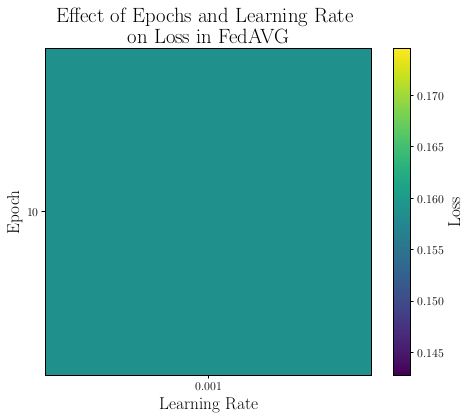

In [78]:
pgf_filename = 'fedavg_heatmap_iid.pgf'
png_filename = 'fedavg_heatmap_iid.png'
pdf_filename = 'fedavg_heatmap_iid.pdf'
data = {
    'epoch': max_epochs,
    'lr': learning_rates,
    'accuracy': accuracies,
    'val_loss' : val_losses,
    'loss' : losses,

}
df = pd.DataFrame(data)
# Aggregate the data by taking the mean accuracy for each unique combination of epoch and lr
df_agg = df.groupby(['epoch', 'lr']).mean().reset_index()

# Pivot the aggregated data to create a matrix of accuracy values
pivot_table = df_agg.pivot('epoch', 'lr', 'loss')

# Create the heatmap plot
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.imshow(pivot_table, cmap='viridis')

# Set the plot labels and titles
ax.set_xticks(np.arange(len(df_agg['lr'].unique())))
ax.set_yticks(np.arange(len(df_agg['epoch'].unique())))
ax.set_xticklabels(df_agg['lr'].unique())
ax.set_yticklabels(df_agg['epoch'].unique())
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Epoch')
ax.set_title('Effect of Epochs and Learning Rate \n on Loss in FedAVG')

# Add colorbar
cbar = plt.colorbar(heatmap)
cbar.set_label('Loss')

# Display the plot
plt.show()
fig.savefig(os.path.join(IMAGES_DIR,pgf_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,png_filename),dpi= 300,bbox_inches='tight')
fig.savefig(os.path.join(IMAGES_DIR,pdf_filename),dpi= 300,bbox_inches='tight')

#### Boxplot epochs

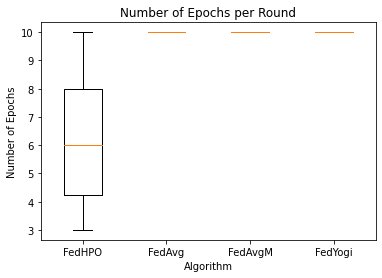

In [248]:
#box plot nummber of epochs in each algorithm
import matplotlib.pyplot as plt

rounds = list(range(1,25))
epochs_per_round_fedhpo = [10,
 10,
 10,
 10,
 9,
 5,
 4,
 4,
 5,
 6,
 6,
 3,
 6,
 7,
 3,
 6,
 8,
 6,
 3,
 8,
 6,
 8,
 7,
 3,
 6,
 4]
epochs_per_round_fedavg  = [10] * 24
epochs_per_round_fedavgm = [10] * 24
epochs_per_round_fedyogi = [10] * 24

# Create a figure and axis object
fig, ax = plt.subplots()

# Add the boxplots to the axis object
ax.boxplot([epochs_per_round_fedhpo, epochs_per_round_fedavg,epochs_per_round_fedavgm,epochs_per_round_fedyogi])

# Set the title and axis labels
ax.set_title('Number of Epochs per Round')
ax.set_xlabel('Algorithm')
ax.set_ylabel('Number of Epochs')

# Set the x-tick labels to be the algorithm names
ax.set_xticklabels(['FedHPO', 'FedAvg','FedAvgM','FedYogi'])

# Show the plot
plt.show()
